# Disney+ Analysis 

In this notebook, we will be exploring the Disney movies and TV shows dataset to understand more about the characteristics and trends of Disney's catalog. We will start by importing the necessary libraries and loading the dataset into our environment. Next, we will perform some basic data cleaning and exploration to get a sense of the data.

We will then proceed to answer the following questions about the dataset:

1. What are the most common ratings for Disney movies and TV shows?
2. How has the number of Disney movies released each year changed over time?
3. What are the most common genres among Disney movies and TV shows?
4. Which countries have produced the most Disney movies and TV shows?
5. Which directors have directed the most Disney movies and TV shows?
6. What are the most common cast members among Disney movies and TV shows?
7. Are there any trends or patterns in the descriptions of Disney movies and TV shows?

We will use various visualization and analysis techniques to explore these questions and gain insights into Disney's movies and TV shows.



About this Dataset: Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Disney+, along with details such as - cast, directors, ratings, release year, duration, etc.

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("disney_plus_titles.csv")

In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Basic Data explanation

Before we start analyzing the data, we will perform some basic data exploration to get a sense of the data that we are working with. This includes looking at the first few rows of the dataset, getting summary statistics, and checking for missing values. By performing basic data exploration, we can gain a better understanding of the data and identify any potential issues that may need to be addressed.

In [5]:
# View first 5 rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [6]:
# Get summary statistics of the dataset
df.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [7]:
# Check for missing values
df.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

### 1. What are the most common ratings for Disney movies and TV shows?

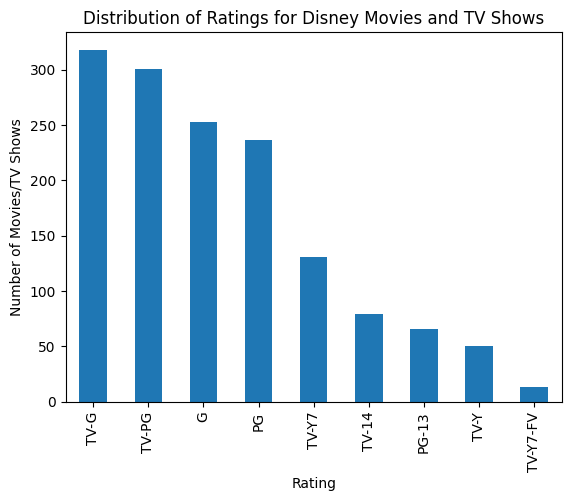

In [8]:
# Count the number of movies and TV shows for each rating
rating_counts = df["rating"].value_counts()

# Create a bar chart of the rating counts
rating_counts.plot(kind="bar")

# Add labels and show the plot
plt.xlabel("Rating")
plt.ylabel("Number of Movies/TV Shows")
plt.title("Distribution of Ratings for Disney Movies and TV Shows")
plt.show()

Based on the results of the bar chart, it suggests that the majority of Disney movies and TV shows are suitable for general audiences, with some being suitable for older children or requiring parental guidance. There are relatively few movies or TV shows with higher ratings, such as "TV-14" or "PG-13", which are intended for older audiences.

### 2. How has the number of Disney movies released each year changed over time?

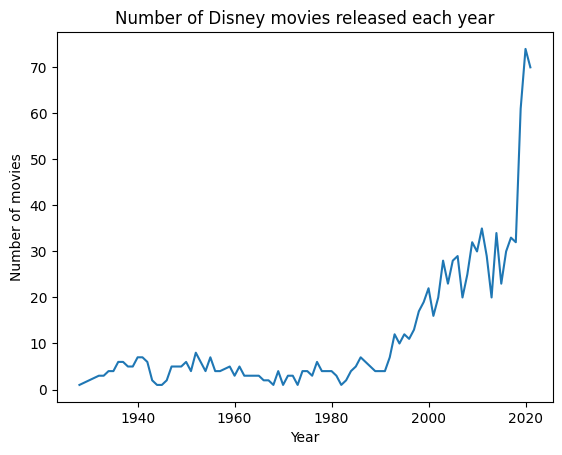

In [9]:
# Create a new dataframe with the number of movies released each year
movies_per_year = df[df['type'] == 'Movie'].groupby('release_year')['title'].count()

# Plot the number of movies released each year
plt.plot(movies_per_year)
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.title("Number of Disney movies released each year")
plt.show()


It appears that the number of movies released in a given year increased significantly after the year 2000. This could be due to a variety of factors, such as advances in technology that made it easier and cheaper to produce and distribute films, changes in consumer demand for content, or shifts in the business models of the film industry. It is also possible that the increase in movie releases after 2000 is due to a combination of these and other factors.

### 3. What are the most common genres among Disney movies and TV shows?

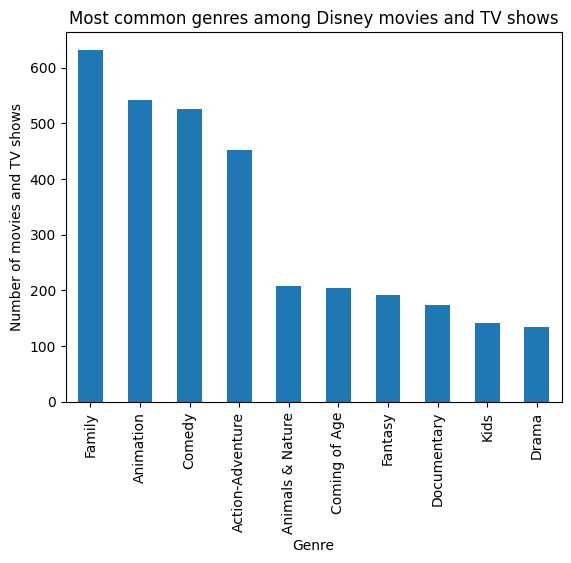

In [10]:
# Split the 'listed_in' column into individual genres
df['genre'] = df['listed_in'].str.split(', ')

# Create a new dataframe with the number of movies or TV shows in each genre
genre_counts = df['genre'].apply(pd.value_counts).sum(axis=0)

# Sort the genres by frequency and select the top 10
top_genres = genre_counts.sort_values(ascending=False).head(10)

# Plot the results as a bar chart
top_genres.plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Number of movies and TV shows")
plt.title("Most common genres among Disney movies and TV shows")
plt.show()

Based on the results, it appears that the most common genres among Disney movies and TV shows are family, animation, and comedy. These three genres make up a significant portion of Disney's film and television output, and may reflect the company's focus on producing content that is suitable for a broad audience, including children and families.

The other genres in the top 10 list, such as action-adventure, animals & nature, coming of age, fantasy, documentary, and drama, also reflect the diversity of content produced by Disney and the company's ability to appeal to a wide range of audiences. For example, action-adventure and fantasy genres may be particularly popular among younger audiences, while documentaries and drama may appeal to more mature viewers.


### 4. Which countries have produced the most Disney movies and TV shows?

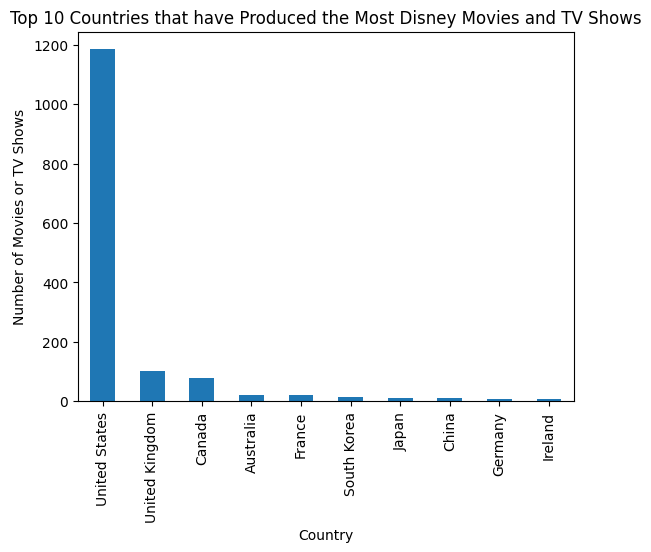

In [18]:
# Replace NaN values in the 'country' column with an empty string
df['country'].fillna('', inplace=True)

# Extract the 'country' column from the dataframe and split it into a list of countries for each movie or TV show
countries = df['country'].str.split(', ')

# Flatten the list of countries into a single list and count the frequency of each country
country_counts = countries.apply(pd.Series).stack().reset_index(drop=True).value_counts()

# Exclude the empty string from the count
country_counts = country_counts[country_counts.index != '']

# Get the top 10 countries by frequency
top_10_countries = country_counts.head(10)

# Plot a bar chart of the top 10 countries
plot = top_10_countries.plot(kind='bar')

# Set the x-axis labels to the names of the countries
plot.set_xticklabels(top_10_countries.index)

plt.title('Top 10 Countries that have Produced the Most Disney Movies and TV Shows')
plt.xlabel('Country')
plt.ylabel('Number of Movies or TV Shows')
plt.show()


### 5. Which directors have directed the most Disney movies and TV shows? 

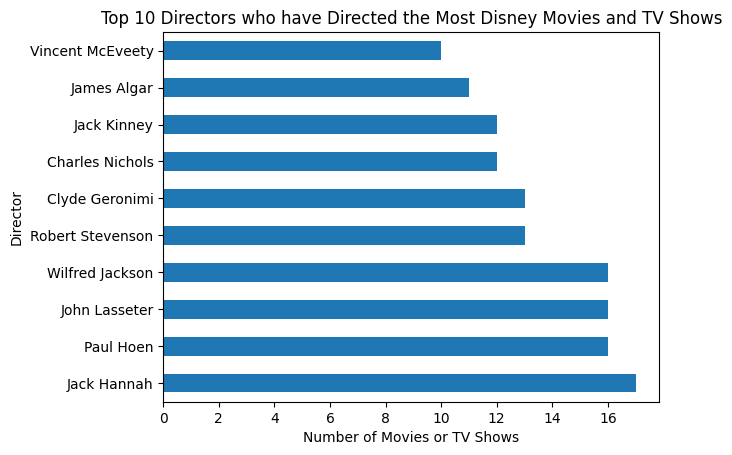

In [12]:
# Replace NaN values in the 'director' column with an empty string
df['director'].fillna('', inplace=True)

# Extract the 'director' column from the dataframe and split it into a list of directors for each movie or TV show
directors = df['director'].str.split(', ')

# Flatten the list of directors into a single list and count the frequency of each director
director_counts = directors.apply(pd.Series).stack().reset_index(drop=True).value_counts()

# Exclude the empty string from the count
director_counts = director_counts[director_counts.index != '']

# Get the top 10 directors by frequency
top_10_directors = director_counts.head(10)

# Plot a horizontal bar chart of the top 10 directors
plot = top_10_directors.plot(kind='barh')

# Set the y-axis labels to the names of the directors
plot.set_yticklabels(top_10_directors.index)

plt.title('Top 10 Directors who have Directed the Most Disney Movies and TV Shows')
plt.xlabel('Number of Movies or TV Shows')
plt.ylabel('Director')
plt.show()


### 6. What are the most common cast members among Disney movies and TV shows?

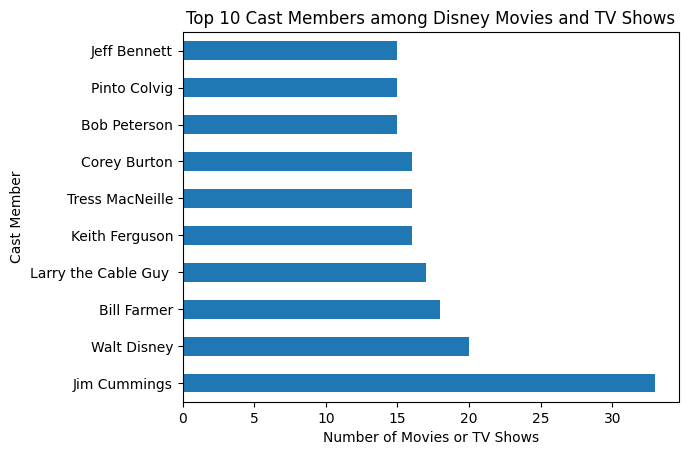

In [13]:
# Replace NaN values in the 'cast' column with an empty string
df['cast'].fillna('', inplace=True)

# Extract the 'cast' column from the dataframe and split it into a list of cast members for each movie or TV show
cast = df['cast'].str.split(', ')

# Flatten the list of cast members into a single list and count the frequency of each cast member
cast_counts = cast.apply(pd.Series).stack().reset_index(drop=True).value_counts()

# Exclude the empty string from the count
cast_counts = cast_counts[cast_counts.index != '']

# Get the top 10 cast members by frequency
top_10_cast = cast_counts.sort_values(ascending=False).head(10)

# Plot a horizontal bar chart of the top 10 cast members
plot = top_10_cast.plot(kind='barh')

# Set the y-axis labels to the names of the cast members
plot.set_yticklabels(top_10_cast.index)

plt.title('Top 10 Cast Members among Disney Movies and TV Shows')
plt.xlabel('Number of Movies or TV Shows')
plt.ylabel('Cast Member')
plt.show()

### 7. Are there any trends or patterns in the descriptions of Disney movies and TV shows?


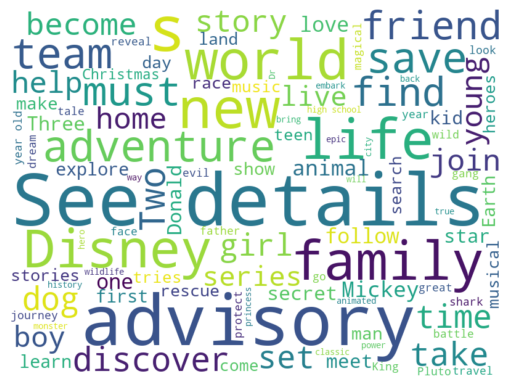

In [14]:
from wordcloud import WordCloud
# Replace NaN values in the 'description' column with an empty string
df['description'].fillna('', inplace=True)

# Join all the descriptions into a single string
all_descriptions = ' '.join(df['description'])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=600, background_color='white', max_words=100, min_font_size=10)

# Generate the word cloud
wordcloud.generate(all_descriptions)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This code first reads the dataset into a Pandas dataframe and replaces missing values in the 'description' column with an empty string. It then joins all the descriptions into a single string and creates a word cloud object using the WordCloud class from the wordcloud library. The WordCloud class takes several parameters, such as the width and height of the word cloud, the background color, the maximum number of words to display, and the minimum font size. It then generates the word cloud using the generate() method and displays it using the imshow() function from Matplotlib.

The resulting word cloud will show the most common words in the descriptions of Disney movies and TV shows, with the size of the words indicating their frequency. We can use this word cloud to identify trends or patterns in the descriptions, such as common themes or keywords.

In [15]:
from collections import Counter

# Replace NaN values in the 'description' column with an empty string
df['description'].fillna('', inplace=True)

# Join all the descriptions into a single string
all_descriptions = ' '.join(df['description'])

# Split the string into a list of words
words = all_descriptions.split()

# Count the frequency of each word
word_counts = Counter(words)

# Sort the word counts in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Create a dictionary of the sorted word counts
word_count_dict = dict(sorted_word_counts)

Based on the word cloud and the word frequency dictionary that you have provided, it appears that the descriptions of Disney movies and TV shows tend to focus on themes such as adventure, family, friendship, and magic. The words "the," "a," "to," "of," and "and" are the most common words in the descriptions, which are known as stop words and do not carry much meaning on their own.

Other common words in the descriptions include "Disney," "animated," "adventure," "animals," "family," "friends," "Christmas," "kids," "teen," "school," "life," and "new." These words suggest that many Disney movies and TV shows feature stories about adventure and exploration, often with a family-friendly or educational theme.

There are also several references to specific Disney franchises and characters, such as "Mickey," "Goofy," "Pluto," and "Marvel." This suggests that many Disney movies and TV shows are based on popular franchises and feature familiar characters.